In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import pingouin as pg
from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd
import statsmodels.formula.api as smfa
from statsmodels.stats.anova import anova_lm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
cats_df = pd.read_csv('data/cats.csv')
cats_df.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [7]:
mu = 2.6
ss.shapiro(cats_df['Bwt']), ss.shapiro(cats_df['Hwt'])

(ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05),
 ShapiroResult(statistic=0.9603861570358276, pvalue=0.0003653781022876501))

In [10]:
ss.wilcoxon(cats_df['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [11]:
ss.ttest_1samp(cats_df['Bwt'], popmean=mu)

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

In [12]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data_df = pd.DataFrame(data)
data_df.head()

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2


In [14]:
ss.shapiro(data_df['after'] - data_df['before'])

ShapiroResult(statistic=0.8148398399353027, pvalue=0.021947871893644333)

In [16]:
ss.ttest_rel(data_df['after'], data_df['before'], alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

In [17]:
female = cats_df.loc[cats_df['Sex'] == 'F', 'Bwt']
male = cats_df.loc[cats_df['Sex'] == 'M', 'Bwt']

In [19]:
ss.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [20]:
ss.ttest_ind(female, male, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

<AxesSubplot:>

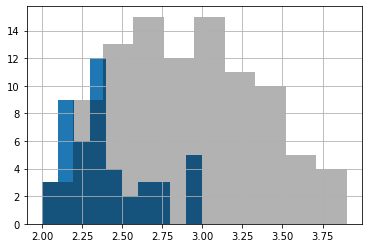

In [23]:
female.hist()
male.hist(color='black', alpha=0.3)

In [25]:
iris_df = pd.read_csv('data/iris.csv')
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
target_list = iris_df['target'].unique()
setosa = iris_df.loc[iris_df['target'] == 'Iris-setosa', 'sepal width']
versicolor = iris_df.loc[iris_df['target'] == 'Iris-versicolor', 'sepal width']
virginica = iris_df.loc[iris_df['target'] == 'Iris-virginica', 'sepal width']

In [27]:
ss.shapiro(setosa), ss.shapiro(versicolor), ss.shapiro(virginica)

(ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427),
 ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507),
 ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896))

In [28]:
ss.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [29]:
ss.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

In [31]:
mc = MultiComparison(data=iris_df['sepal width'], groups=iris_df['target'])
tukey = mc.tukeyhsd(alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [32]:
ss.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [33]:
pg.welch_anova(data=iris_df, dv='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [34]:
mt_df = pd.read_csv('data/mtcars.csv')
mt_df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [40]:
formula = 'mpg ~ C(am) + C(cyl) + C(am):C(cyl)'
model = smfa.ols(formula, mt_df).fit()
aov_table = anova_lm(model, typ=2)
aov_table.round(3)

,sum_sq,df,F,PR(>F)
C(am),36.767,1.0,3.999,0.056
C(cyl),456.401,2.0,24.819,0.000
C(am):C(cyl),25.437,2.0,1.383,0.269
Residual,239.059,26.0,NaN,NaN


In [45]:
mc = MultiComparison(data=mt_df['mpg'], groups=mt_df['cyl'])
tukey = mc.tukeyhsd(alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
4,6,-6.9208,0.0003,-10.7693,-3.0722,True
4,8,-11.5636,0.0,-14.7708,-8.3565,True
6,8,-4.6429,0.0112,-8.3276,-0.9581,True


In [46]:
tit_df = pd.read_csv('data/titanic.csv')
obs = tit_df[tit_df['survived'] == 1]['sex'].value_counts().reindex(['female', 'male'])
exp = tit_df['sex'].value_counts(normalize=True).reindex(['female', 'male']).mul(obs.sum())
obs, exp

(female    233
 male      109
 Name: sex, dtype: int64,
 female    120.525253
 male      221.474747
 Name: sex, dtype: float64)

In [51]:
ss.chisquare(f_obs=obs, f_exp=exp)

Power_divergenceResult(statistic=162.08166685161612, pvalue=3.970516389658729e-37)

In [52]:
table = pd.crosstab(tit_df['class'], tit_df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [56]:
chi, p, ddof, f_exp = ss.chi2_contingency(observed=table)
chi, p, ddof, f_exp

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [57]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df[['price', 'sqft_living']].corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [58]:
formula = 'price ~ sqft_living'
model = smfa.ols(formula, data=house_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:32:33   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

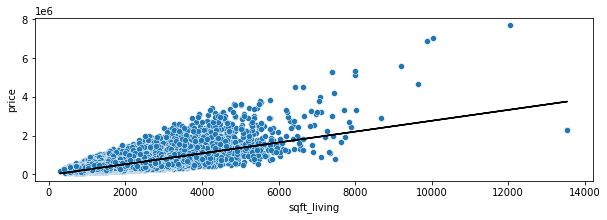

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
sns.scatterplot(data=house_df, x='sqft_living', y='price', ax=ax)
ax.plot(house_df['sqft_living'], model.predict(house_df['sqft_living']), color='black')

In [63]:
car_df = pd.read_csv('data/Cars93.csv')
car_df.columns = car_df.columns.str.replace('.', '')
car_df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_7152\1094043285.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_df.columns = car_df.columns.str.replace('.', '')


,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [64]:
ind_var = ['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']
model = smfa.ols('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=car_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           4.88e-14
Time:                        18:48:00   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
car_df[ind_var].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [67]:
y, X = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=car_df, return_type='dataframe')

In [69]:
vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [71]:
model = smfa.ols('Price ~ EngineSize + RPM + Weight + MPGhighway', data=car_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.26e-15
Time:                        18:53:56   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""